In [76]:
import pandas as pd

seeds_df = pd.read_csv('data_seeds.csv')

# extract the grain varieties from the dataframe
varieties = list(seeds_df['grain_variety'])
del seeds_df['grain_variety']

samples = seeds_df.values

In [12]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [4]:
from sklearn.cluster import KMeans

In [199]:
model = KMeans(n_clusters=3)

In [200]:
labels = model.fit_predict(samples)

In [201]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [202]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

In [203]:
ct = pd.crosstab(df['labels'], df['varieties'])

In [204]:
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,68,9,0
1,0,1,60
2,2,60,10


In [17]:
df.head()

,labels,varieties
0,1,Kama wheat
1,1,Kama wheat
2,1,Kama wheat
3,1,Kama wheat
4,1,Kama wheat


In [33]:
centroid=model.cluster_centers_

In [35]:

cent=pd.DataFrame(centroid)

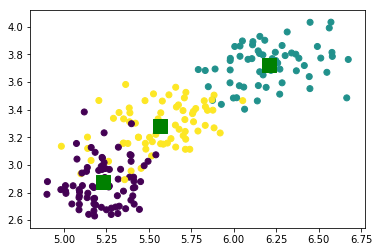

In [36]:
import matplotlib.pyplot as plt
plt.scatter(seeds_df['length'], seeds_df['width'], c=labels)
plt.scatter(cent.iloc[:,3],cent.iloc[:,4], s=200, c='g', marker='s')
plt.show()

In [11]:
x=(60+68+60)/(60+68+60+22)

In [12]:
x

0.8952380952380953

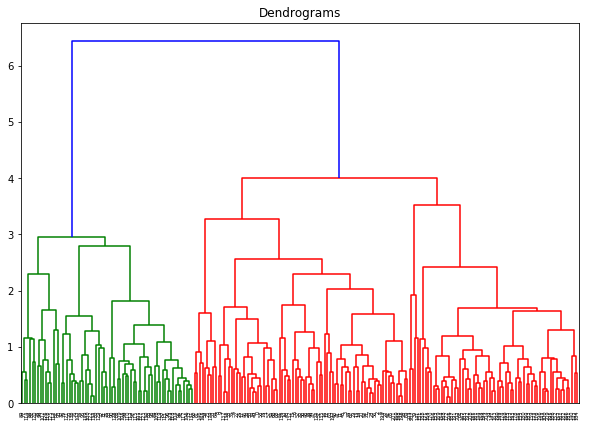

In [64]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(samples, method='average'))

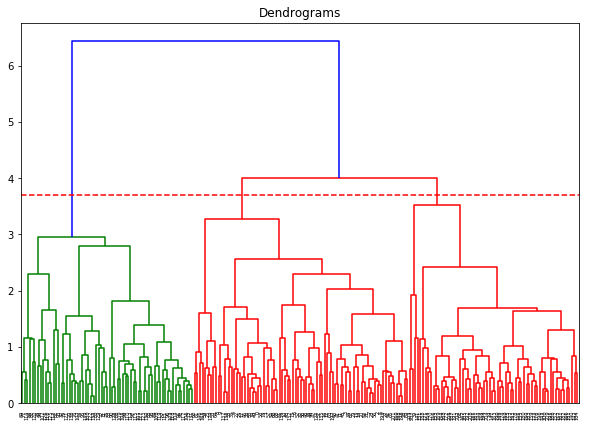

In [63]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(samples, method='average'))
plt.axhline(y=3.7, color='r', linestyle='--')

In [205]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
cluster.fit_predict(samples)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [206]:
label_pred=cluster.fit_predict(samples)
df = pd.DataFrame({'labels': label_pred, 'varieties': varieties})

In [207]:
ct = pd.crosstab(df['labels'], df['varieties'])

In [208]:
df['varieties'].value_counts()

Canadian wheat    70
Kama wheat        70
Rosa wheat        70
Name: varieties, dtype: int64

In [209]:
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,61,3,0
1,0,1,64
2,9,66,6


In [60]:
(61+64+66)/(70+54+63+23)

0.9095238095238095

In [66]:
#centroid=
cluster.labels_
#cent=pd.DataFrame(centroid)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

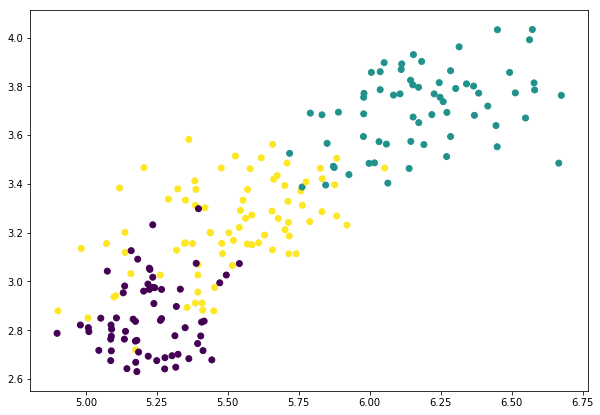

In [69]:
plt.figure(figsize=(10, 7))  
plt.scatter(seeds_df['length'], seeds_df['width'], c=cluster.labels_) 

### PCA

In [77]:
#Standarization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(seeds_df)

In [82]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00478469  0.99909854  0.61119889  0.9545308   0.97541544 -0.23067077
   0.86782525]
 [ 0.99909854  1.00478469  0.53177587  0.97707507  0.94935008 -0.21838028
   0.89504603]
 [ 0.61119889  0.53177587  1.00478469  0.36967551  0.7652787  -0.33305686
   0.22791011]
 [ 0.9545308   0.97707507  0.36967551  1.00478469  0.86453176 -0.1723833
   0.93726927]
 [ 0.97541544  0.94935008  0.7652787   0.86453176  1.00478469 -0.25927117
   0.75271583]
 [-0.23067077 -0.21838028 -0.33305686 -0.1723833  -0.25927117  1.00478469
  -0.01113203]
 [ 0.86782525  0.89504603  0.22791011  0.93726927  0.75271583 -0.01113203
   1.00478469]]


In [83]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00478469  0.99909854  0.61119889  0.9545308   0.97541544 -0.23067077
   0.86782525]
 [ 0.99909854  1.00478469  0.53177587  0.97707507  0.94935008 -0.21838028
   0.89504603]
 [ 0.61119889  0.53177587  1.00478469  0.36967551  0.7652787  -0.33305686
   0.22791011]
 [ 0.9545308   0.97707507  0.36967551  1.00478469  0.86453176 -0.1723833
   0.93726927]
 [ 0.97541544  0.94935008  0.7652787   0.86453176  1.00478469 -0.25927117
   0.75271583]
 [-0.23067077 -0.21838028 -0.33305686 -0.1723833  -0.25927117  1.00478469
  -0.01113203]
 [ 0.86782525  0.89504603  0.22791011  0.93726927  0.75271583 -0.01113203
   1.00478469]]


In [84]:
#Covariance Matrix
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.44447352  0.02656355 -0.02587094  0.19363997  0.20441167 -0.73480569
  -0.42643686]
 [ 0.44157147  0.08400282  0.05983912  0.29545659  0.17427591  0.67075153
  -0.47623853]
 [ 0.27701737 -0.52915125 -0.62969178 -0.3328164  -0.33265481  0.0725527
  -0.14162884]
 [ 0.42356333  0.20597518  0.21187966  0.26340659 -0.76609839 -0.04627605
   0.27357647]
 [ 0.43281866 -0.11668963 -0.21648338  0.19963039  0.46536555  0.03928908
   0.70301171]
 [-0.11869248  0.71688203 -0.67950584  0.09246481 -0.03625822  0.00372346
  -0.01964186]
 [ 0.38716084  0.37719327  0.2138972  -0.80414995  0.11134657  0.0344981
   0.04282974]]

Eigenvalues 
[5.05527392e+00 1.20330286e+00 6.81247474e-01 6.86915798e-02
 1.88031478e-02 8.16283865e-04 5.35755786e-03]


In [85]:
#Correlation Matrix
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.44447352  0.02656355 -0.02587094  0.19363997  0.20441167 -0.73480569
  -0.42643686]
 [ 0.44157147  0.08400282  0.05983912  0.29545659  0.17427591  0.67075153
  -0.47623853]
 [ 0.27701737 -0.52915125 -0.62969178 -0.3328164  -0.33265481  0.0725527
  -0.14162884]
 [ 0.42356333  0.20597518  0.21187966  0.26340659 -0.76609839 -0.04627605
   0.27357647]
 [ 0.43281866 -0.11668963 -0.21648338  0.19963039  0.46536555  0.03928908
   0.70301171]
 [-0.11869248  0.71688203 -0.67950584  0.09246481 -0.03625822  0.00372346
  -0.01964186]
 [ 0.38716084  0.37719327  0.2138972  -0.80414995  0.11134657  0.0344981
   0.04282974]]

Eigenvalues 
[5.03120119e+00 1.19757285e+00 6.78003439e-01 6.83644770e-02
 1.87136090e-02 8.12396799e-04 5.33204568e-03]


In [78]:
#Cross Checking  whether eigen vector arrived from covariance or correlation is correct using SVD
import numpy as np
u,s,v = np.linalg.svd(X_std.T)

In [116]:
u

array([[-0.44447352, -0.02656355,  0.02587094, -0.19363997,  0.20441167,
         0.42643686, -0.73480569],
       [-0.44157147, -0.08400282, -0.05983912, -0.29545659,  0.17427591,
         0.47623853,  0.67075153],
       [-0.27701737,  0.52915125,  0.62969178,  0.3328164 , -0.33265481,
         0.14162884,  0.0725527 ],
       [-0.42356333, -0.20597518, -0.21187966, -0.26340659, -0.76609839,
        -0.27357647, -0.04627605],
       [-0.43281866,  0.11668963,  0.21648338, -0.19963039,  0.46536555,
        -0.70301171,  0.03928908],
       [ 0.11869248, -0.71688203,  0.67950584, -0.09246481, -0.03625822,
         0.01964186,  0.00372346],
       [-0.38716084, -0.37719327, -0.2138972 ,  0.80414995,  0.11134657,
        -0.04282974,  0.0344981 ]])

In [80]:
s

array([32.50464965, 15.85844563, 11.93233934,  3.78900253,  1.98238692,
        1.05817276,  0.41304156])

In [81]:
v

array([[-9.75389845e-03,  1.04175180e-04,  1.41346960e-02, ...,
         4.31825238e-02,  7.19690195e-02,  6.01745581e-02],
       [ 4.94165086e-02,  1.20643203e-01,  1.20265586e-01, ...,
        -8.18864985e-02,  6.28678866e-03, -3.31098769e-02],
       [-5.28823388e-02, -5.61293506e-02,  7.81480305e-02, ...,
         2.43524031e-01, -3.20570094e-02,  8.49048435e-02],
       ...,
       [ 5.57540043e-02, -6.06051540e-02, -5.86012329e-02, ...,
         9.17597802e-01,  1.21387713e-02, -2.85699702e-02],
       [ 7.44655444e-02, -7.04823710e-03,  2.85522223e-02, ...,
         1.26928082e-02,  9.89020006e-01,  3.67647880e-04],
       [ 6.54336106e-02, -2.72114330e-02, -8.67834993e-03, ...,
        -2.62813637e-02, -4.54054287e-04,  9.83788515e-01]])

In [86]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In [87]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.031201185972806
1.1975728469710651
0.6780034385804469
0.06836447699210847
0.018713609002734926
0.0053320456813728025
0.0008123967994738842


In [88]:
eig_pairs

[(5.031201185972806,
  array([ 0.44447352,  0.44157147,  0.27701737,  0.42356333,  0.43281866,
         -0.11869248,  0.38716084])),
 (1.1975728469710651,
  array([ 0.02656355,  0.08400282, -0.52915125,  0.20597518, -0.11668963,
          0.71688203,  0.37719327])),
 (0.6780034385804469,
  array([-0.02587094,  0.05983912, -0.62969178,  0.21187966, -0.21648338,
         -0.67950584,  0.2138972 ])),
 (0.06836447699210847,
  array([ 0.19363997,  0.29545659, -0.3328164 ,  0.26340659,  0.19963039,
          0.09246481, -0.80414995])),
 (0.018713609002734926,
  array([ 0.20441167,  0.17427591, -0.33265481, -0.76609839,  0.46536555,
         -0.03625822,  0.11134657])),
 (0.0053320456813728025,
  array([-0.42643686, -0.47623853, -0.14162884,  0.27357647,  0.70301171,
         -0.01964186,  0.04282974])),
 (0.0008123967994738842,
  array([-0.73480569,  0.67075153,  0.0725527 , -0.04627605,  0.03928908,
          0.00372346,  0.0344981 ]))]

In [89]:
eig_vecs

array([[ 0.44447352,  0.02656355, -0.02587094,  0.19363997,  0.20441167,
        -0.73480569, -0.42643686],
       [ 0.44157147,  0.08400282,  0.05983912,  0.29545659,  0.17427591,
         0.67075153, -0.47623853],
       [ 0.27701737, -0.52915125, -0.62969178, -0.3328164 , -0.33265481,
         0.0725527 , -0.14162884],
       [ 0.42356333,  0.20597518,  0.21187966,  0.26340659, -0.76609839,
        -0.04627605,  0.27357647],
       [ 0.43281866, -0.11668963, -0.21648338,  0.19963039,  0.46536555,
         0.03928908,  0.70301171],
       [-0.11869248,  0.71688203, -0.67950584,  0.09246481, -0.03625822,
         0.00372346, -0.01964186],
       [ 0.38716084,  0.37719327,  0.2138972 , -0.80414995,  0.11134657,
         0.0344981 ,  0.04282974]])

In [90]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [117]:
tot

7.000000000000009

In [93]:
var_exp

[71.87430265675428,
 17.10818352815805,
 9.685763408292086,
 0.9766353856015484,
 0.26733727146764147,
 0.07617208116246851,
 0.011605668563912616]

In [91]:
cum_var_exp

array([ 71.87430266,  88.98248618,  98.66824959,  99.64488498,
        99.91222225,  99.98839433, 100.        ])

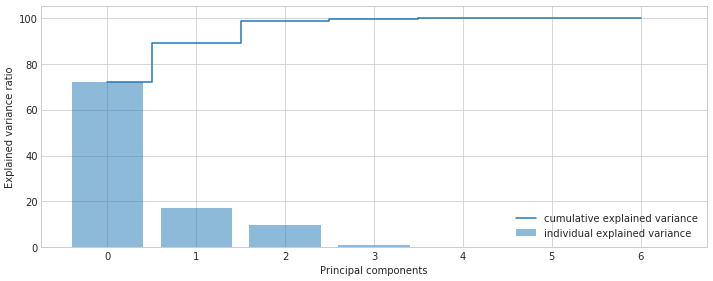

In [110]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 4))
    plt.bar(range(7),var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.step(range(7), cum_var_exp, where='mid',label='cumulative explained variance')    
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [154]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1),
                      eig_pairs[1][1].reshape(7,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.44447352  0.02656355]
 [ 0.44157147  0.08400282]
 [ 0.27701737 -0.52915125]
 [ 0.42356333  0.20597518]
 [ 0.43281866 -0.11668963]
 [-0.11869248  0.71688203]
 [ 0.38716084  0.37719327]]


In [155]:
X_std

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

In [156]:
Y = X_std.dot(matrix_w)

In [157]:
Y

array([[ 3.17047052e-01, -7.83669015e-01],
       [-3.38617773e-03, -1.91321367e+00],
       [-4.59443341e-01, -1.90722525e+00],
       [-5.91935651e-01, -1.93106922e+00],
       [ 1.10291005e+00, -2.06809003e+00],
       [-3.36815150e-01, -1.63691626e+00],
       [-1.45602498e-01, -4.36414570e-01],
       [-4.25439933e-01, -1.39015330e+00],
       [ 1.76718434e+00, -3.07528830e-01],
       [ 1.44119415e+00, -1.01106830e+00],
       [ 6.71107449e-02,  4.29312461e-01],
       [-5.72683493e-01, -1.55824408e+00],
       [-9.31414541e-01, -8.73925640e-01],
       [-9.14882766e-01, -8.71940034e-01],
       [-1.00836149e+00, -9.58530316e-01],
       [-5.15522337e-01, -1.05872649e+00],
       [-7.84530515e-01, -1.14197655e+00],
       [ 6.79029059e-01, -2.17036180e+00],
       [-2.34416607e-01, -2.78779387e+00],
       [-1.73767215e+00, -3.40140568e-01],
       [-5.61482567e-01, -1.58659628e-01],
       [-4.77524312e-01, -7.04746626e-01],
       [ 8.57383186e-01, -2.32117455e+00],
       [-1.

In [220]:
seeds_df = pd.read_csv('data_seeds.csv')
y=seeds_df.ix[:,7]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


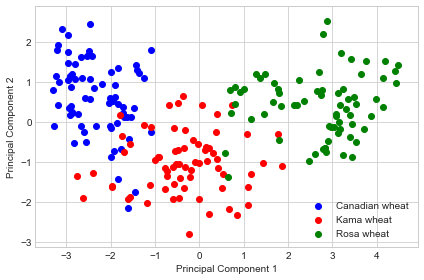

In [159]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Canadian wheat', 'Kama wheat', 'Rosa wheat'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

In [186]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [187]:
Y_sklearn #check output Y and Y_sklearn is simliar

array([[ 3.17047052e-01,  7.83669015e-01, -6.31010011e-01],
       [-3.38617773e-03,  1.91321367e+00, -6.69754458e-01],
       [-4.59443341e-01,  1.90722525e+00,  9.32488818e-01],
       [-5.91935651e-01,  1.93106922e+00,  4.99310922e-01],
       [ 1.10291005e+00,  2.06809003e+00,  5.67054118e-02],
       [-3.36815150e-01,  1.63691626e+00,  4.38913151e-01],
       [-1.45602498e-01,  4.36414570e-01,  3.01945052e-01],
       [-4.25439933e-01,  1.39015330e+00,  4.01288373e-01],
       [ 1.76718434e+00,  3.07528830e-01, -9.68165725e-01],
       [ 1.44119415e+00,  1.01106830e+00, -3.83042144e-01],
       [ 6.71107449e-02, -4.29312461e-01,  3.25292810e-01],
       [-5.72683493e-01,  1.55824408e+00, -4.21773063e-01],
       [-9.31414541e-01,  8.73925640e-01,  9.48782466e-01],
       [-9.14882766e-01,  8.71940034e-01,  1.35349927e-01],
       [-1.00836149e+00,  9.58530316e-01, -2.09395370e-03],
       [-5.15522337e-01,  1.05872649e+00,  1.43548717e+00],
       [-7.84530515e-01,  1.14197655e+00

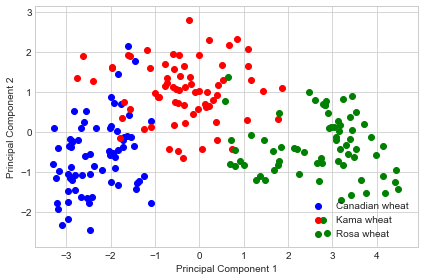

In [188]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Canadian wheat', 'Kama wheat', 'Rosa wheat'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

In [189]:
var=sklearn_pca.explained_variance_ratio_

In [190]:
var

array([0.71874303, 0.17108184, 0.09685763])

### Points to Remember for PCA
1. PCA is used to overcome features redundancy in a data set.
2. These features are low dimensional in nature.
3. These features a.k.a components are a resultant of normalized linear combination of original predictor variables.
4. These components aim to capture as much information as possible with high explained variance.
5. The first component has the highest variance followed by second, third and so on.
6. The components must be uncorrelated (remember orthogonal direction ? ).
7. Normalizing data becomes extremely important when the predictors are measured in different units.
8. PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.
9. PCA is applied on a data set with numeric variables.
10. PCA is a tool which helps to produce better visualizations of high dimensional data.


In [191]:
#Sample 
labels1 = model.fit_predict(Y_sklearn)

In [192]:
df1 = pd.DataFrame({'labels': label_pred, 'varieties': varieties})
ct1 = pd.crosstab(df1['labels'], df1['varieties'])

In [193]:
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,61,3,0
1,0,1,64
2,9,66,6


In [222]:
seeds_df['grain_variety']=seeds_df['grain_variety'].map({'Canadian wheat':0,'Kama wheat':1,'Rosa wheat':2})

In [225]:
y_data=seeds_df['grain_variety']

In [226]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Y_sklearn,y_data,test_size=0.3,random_state=100)

In [227]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [228]:
y_pred=dt.predict(x_test)

In [229]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve,f1_score

In [230]:
confusion_matrix(y_test,y_pred)

array([[22,  4,  0],
       [ 5, 11,  0],
       [ 0,  1, 20]], dtype=int64)

In [234]:
accuracy_score(y_test,y_pred)

0.8412698412698413

In [231]:
y_pred1=dt.predict(Y_sklearn)

In [233]:
confusion_matrix(y_data,y_pred1)

array([[66,  4,  0],
       [ 5, 65,  0],
       [ 0,  1, 69]], dtype=int64)

In [249]:
accuracy_score(y_data,y_pred1)

0.9523809523809523

In [235]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [236]:
y_pred_knn=knn.predict(x_test)

In [237]:
confusion_matrix(y_test,y_pred_knn)

array([[25,  1,  0],
       [ 0, 16,  0],
       [ 0,  0, 21]], dtype=int64)

In [240]:
accuracy_score(y_test,y_pred_knn)

0.9841269841269841

In [244]:
f1_score(y_test,y_pred_knn,average='weighted')

0.9842118665648076

In [245]:
y_pred_knn1=knn.predict(Y_sklearn)

In [248]:
confusion_matrix(y_data,y_pred_knn1)

array([[67,  3,  0],
       [ 4, 65,  1],
       [ 0,  3, 67]], dtype=int64)

In [250]:
accuracy_score(y_data,y_pred_knn1)

0.9476190476190476

In [251]:
f1_score(y_data,y_pred_knn1,average='weighted')

0.9477849727618461

## Pipeline 

In [253]:
from sklearn.pipeline import Pipeline,make_pipeline

In [ ]:
pipe=Pipeline()
m_pipe=make_pipeline()